In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [28]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE1.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [29]:
df_copy=df.drop(['day', 'month', 'year'],axis=1)

In [30]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [31]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [32]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [33]:
X=df_copy.drop(['FWI'],axis=1)
y=df_copy['FWI']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.640179,-0.295442,-0.303129,0.682819,0.495974,0.399434,0.608042,0.474804,0.528734,0.238873
RH,-0.640179,1.000000,0.201762,0.226259,-0.640759,-0.421517,-0.253547,-0.715106,-0.373155,-0.443073,-0.394121
Ws,-0.295442,0.201762,1.000000,0.244784,-0.169620,0.009523,0.092367,-0.004035,0.040699,-0.062718,-0.182236
Rain,-0.303129,0.226259,0.244784,1.000000,-0.536790,-0.288856,-0.304328,-0.341902,-0.300998,-0.367767,-0.051964
FFMC,0.682819,-0.640759,-0.169620,-0.536790,1.000000,0.625593,0.533040,0.748574,0.613526,0.781730,0.251710
DMC,0.495974,-0.421517,0.009523,-0.288856,0.625593,1.000000,0.870419,0.692435,0.983426,0.619536,0.210853
DC,0.399434,-0.253547,0.092367,-0.304328,0.533040,0.870419,1.000000,0.524898,0.943125,0.551208,-0.056844
ISI,0.608042,-0.715106,-0.004035,-0.341902,0.748574,0.692435,0.524898,1.000000,0.652179,0.737184,0.290294
BUI,0.474804,-0.373155,0.040699,-0.300998,0.613526,0.983426,0.943125,0.652179,1.000000,0.616406,0.115434
Classes,0.528734,-0.443073,-0.062718,-0.367767,0.781730,0.619536,0.551208,0.737184,0.616406,1.000000,0.177257


<Axes: >

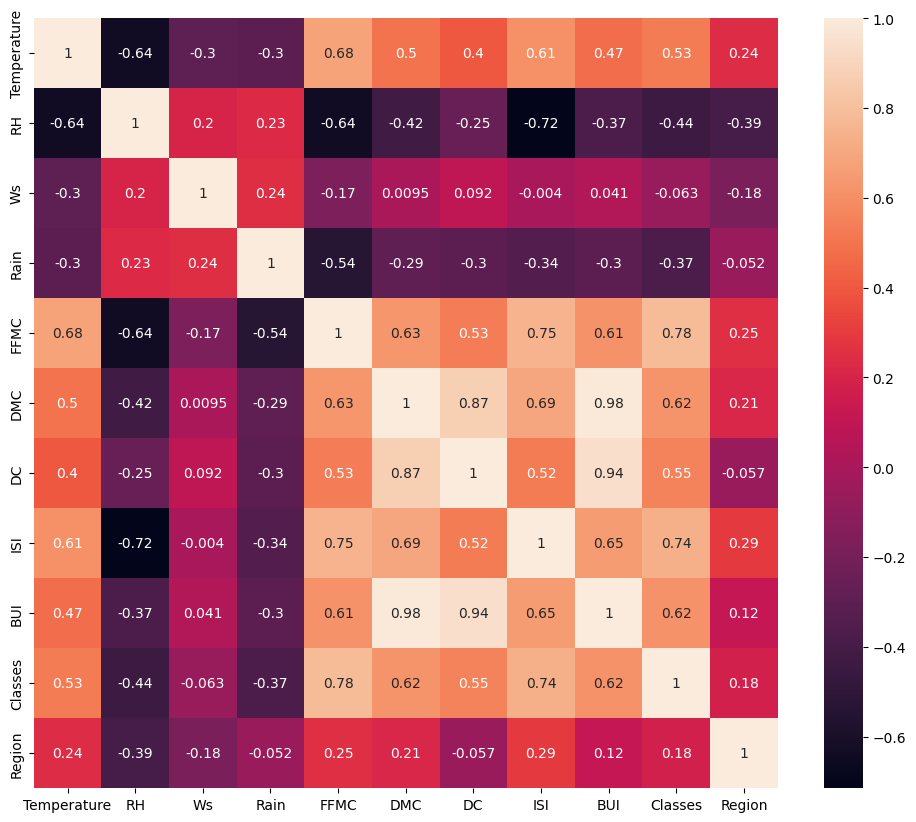

In [36]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr, annot=True)

In [37]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [38]:
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [39]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape, X_test.shape

((170, 9), (73, 9))

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

box blot to understand effect of standard scaler

Text(0.5, 1.0, 'X_train after scaling')

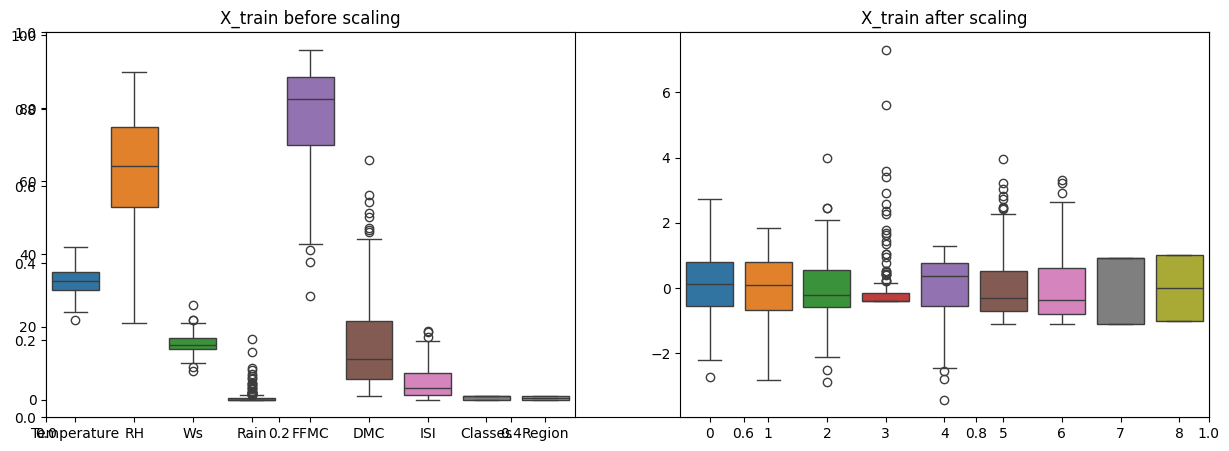

In [41]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

MAE: 0.5648036371485072
R2: 0.9847206874554418


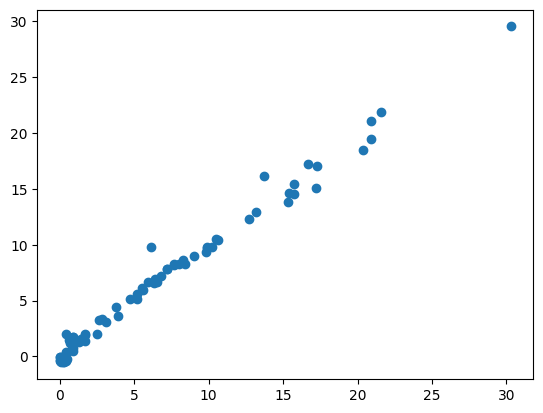

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2:',r2)
plt.scatter(y_test,y_pred)

MAE: 1.1203368882393199
R2: 0.9511364350928344


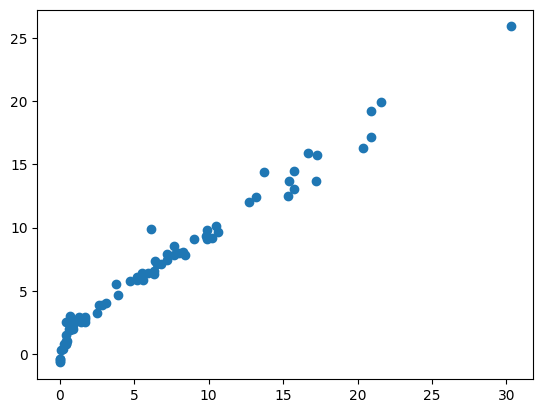

In [43]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
laso=Lasso()
laso.fit(X_train_scaled,y_train)
y_pred=laso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2:',r2)
plt.scatter(y_test,y_pred)

In [44]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
lassocv.alpha_

np.float64(0.06177603120682054)

MAE: 0.635601574451742
R2: 0.9821627684487946


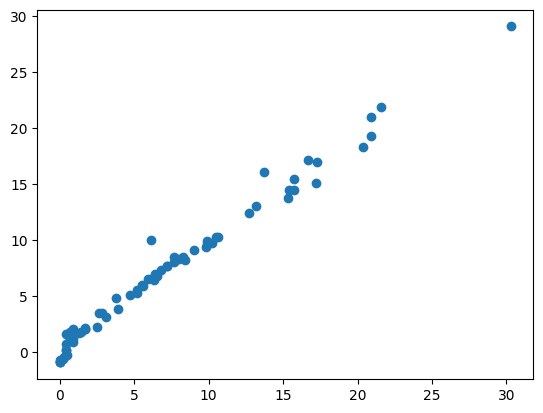

In [45]:
y_pred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2:',r2)
plt.scatter(y_test,y_pred)

MAE: 0.5844876727578021
R2: 0.9841610358272456


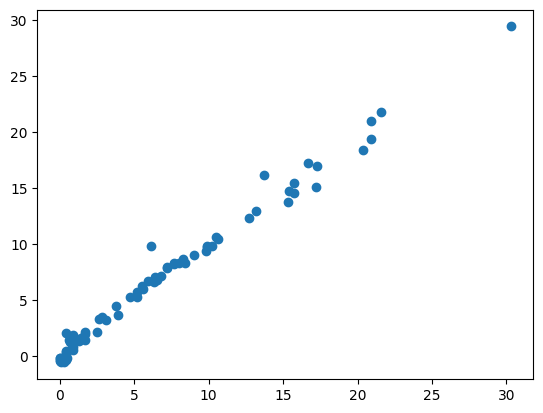

In [46]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2:',r2)
plt.scatter(y_test,y_pred)

In [47]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
ridgecv.alpha_

np.float64(10.0)

MAE: 0.7943132619521893
R2: 0.9762231929195331


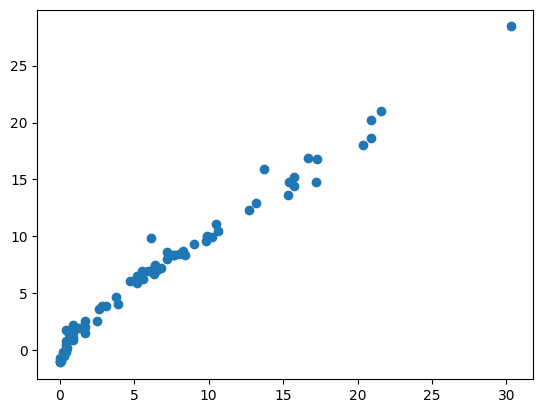

In [48]:
y_pred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2:',r2)
plt.scatter(y_test,y_pred)

In [49]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

MAE: 1.8554687479717549
R2: 0.8804077479376988


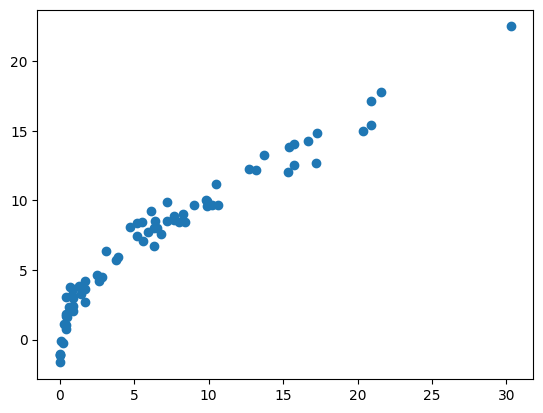

In [50]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elasticnet=ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred=elasticnet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2:',r2)
plt.scatter(y_test,y_pred)

In [52]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))